# Smoothing Images

In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

%matplotlib inline

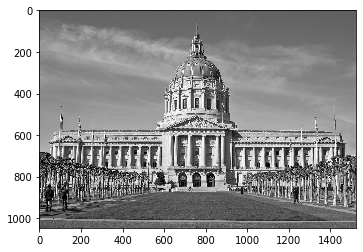

In [7]:
img = cv.imread('images/city_hall.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.show()

## High-pass filter

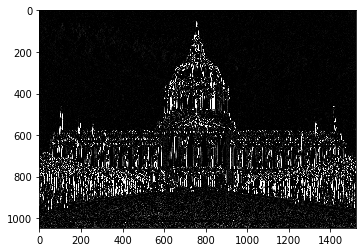

In [34]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

plt.imshow(img_sobel, cmap='gray')
plt.show()

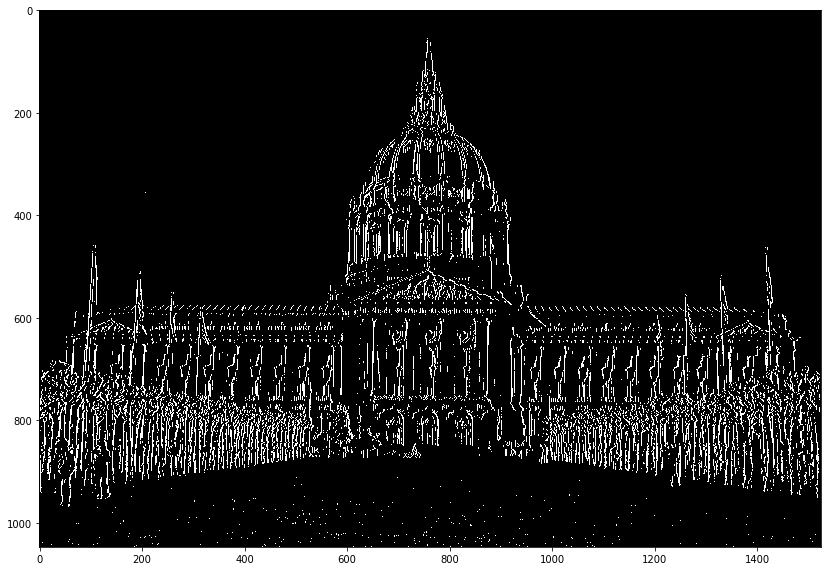

In [15]:
_, img_binary = cv.threshold(img_sobel, 100, 255, cv.THRESH_BINARY)

plt.figure(figsize=(14, 10))
plt.imshow(img_binary, cmap='gray')
plt.show()

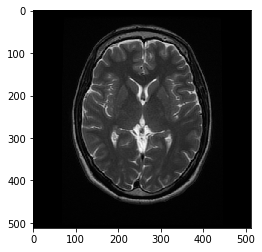

In [28]:
img_brain = cv.imread('images/brain_MR.jpg', cv.IMREAD_GRAYSCALE)
img_brain = np.float32(img_brain)

plt.imshow(img_brain, cmap='gray')
plt.show()

## Gaussian blur

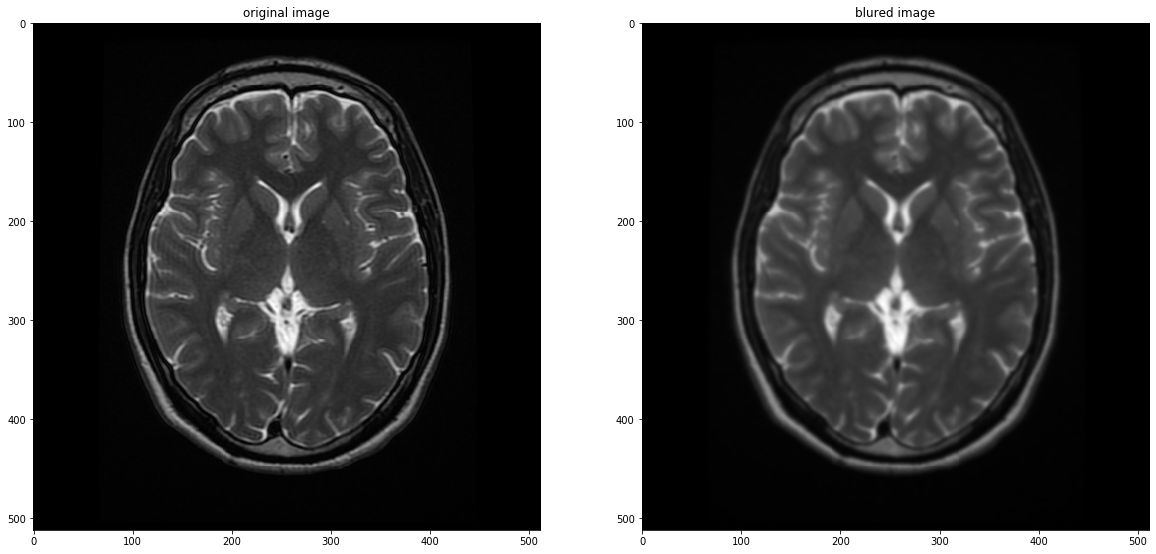

In [109]:
img_brain_blur = cv.GaussianBlur(img_brain, ksize=(9 ,9), sigmaX=0)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('original image')
ax1.imshow(img_brain, cmap='gray')

ax2.set_title('blured image')
ax2.imshow(img_brain_blur, cmap='gray')

plt.show()

## Magnitude
Sobel also detects which edges are strongest. This is encapsulated by the magnitude of the gradient; the greater the magnitude, the stronger the edge is. The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the x and y directions, the magnitude is the square root of the sum of the squares.

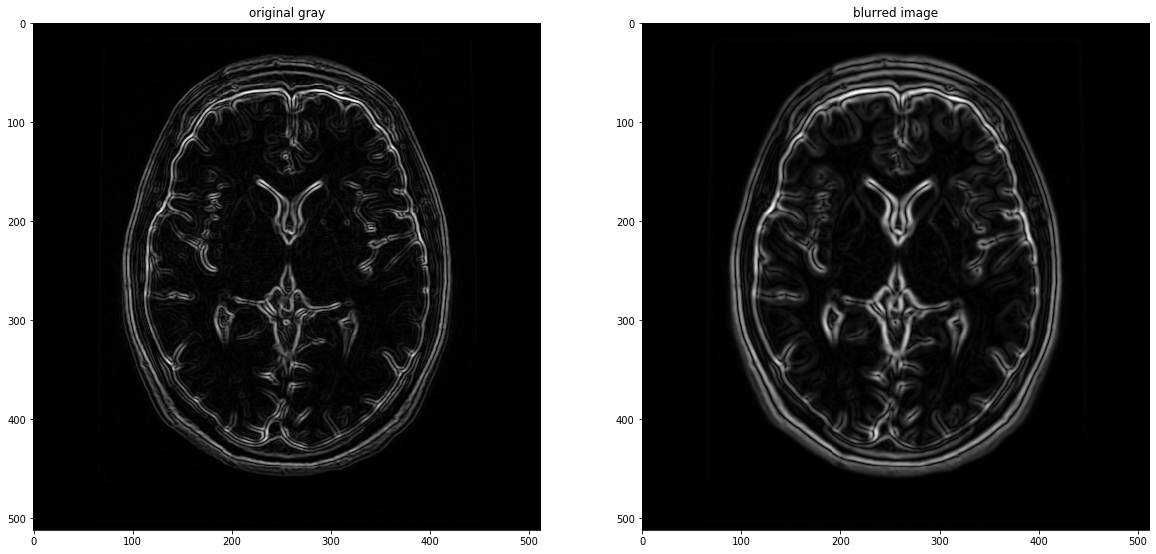

In [110]:
# 3x3 sobel filters for edge detection
sobel_x = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1],
])

sobel_y = np.array([
    [-1, -2, -1], 
    [ 0,  0,  0], 
    [ 1,  2,  1],
])

filtered_x = cv.filter2D(img_brain, -1, sobel_x)
filtered_y = cv.filter2D(img_brain, -1, sobel_y)

filtered = np.sqrt(filtered_x**2 + filtered_y**2)

filtered_blurred_x = cv.filter2D(img_brain_blur, -1, sobel_x)
filtered_blurred_y = cv.filter2D(img_brain_blur, -1, sobel_y)

filtered_blurred = np.sqrt(filtered_blurred_x**2 + filtered_blurred_y**2)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

plt.show()

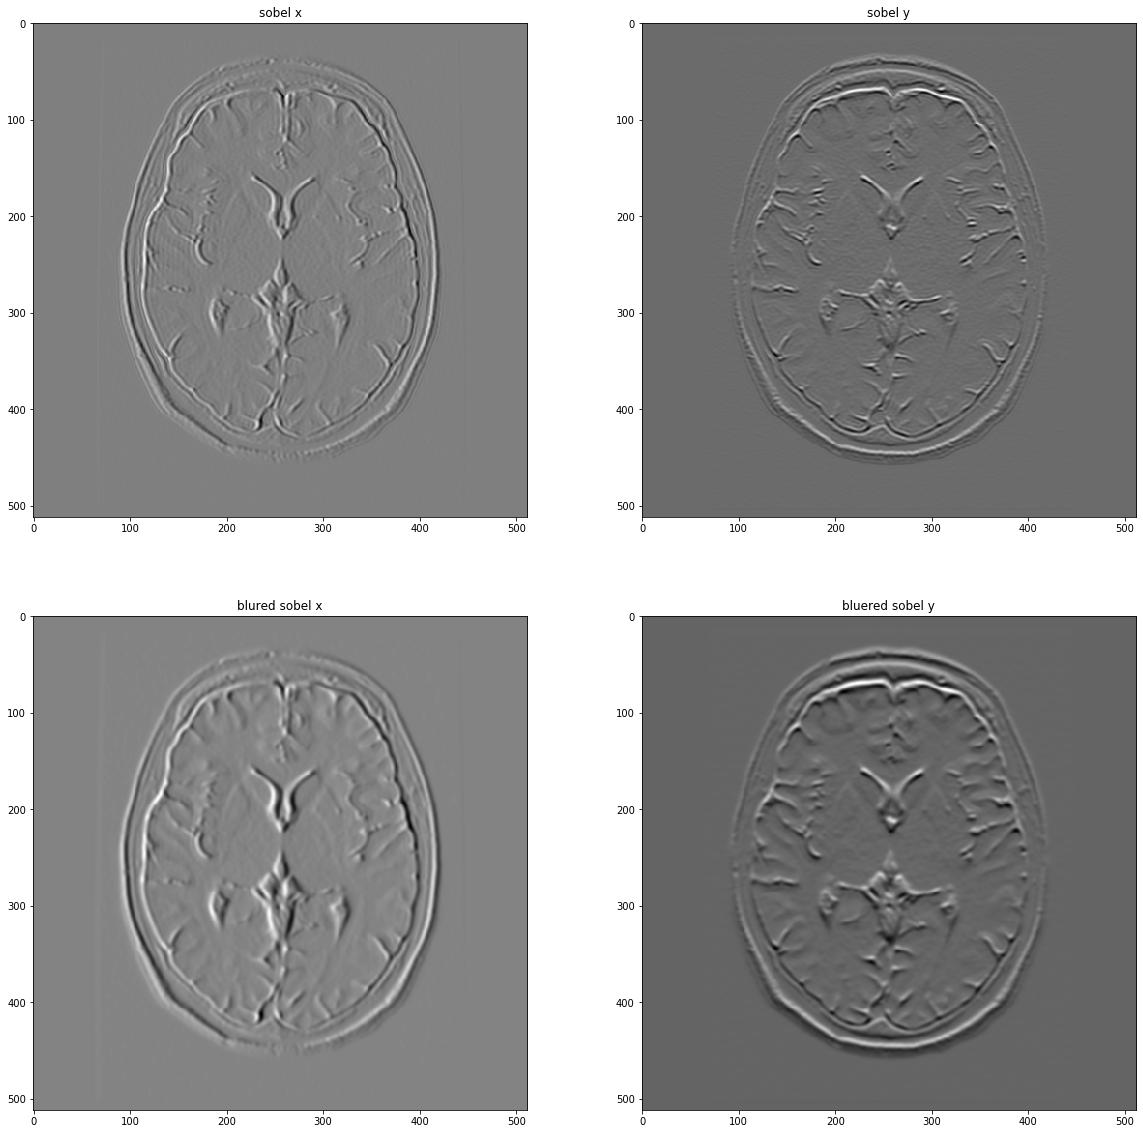

In [33]:
_, axi = plt.subplots(2, 2, figsize=(20, 20))

titles = ['sobel x', 'sobel y', 'blured sobel x', 'bluered sobel y']
filtered_imgs = [filtered_x, filtered_y, filtered_blurred_x, filtered_blurred_y]

for i, ax in enumerate(axi.flat):
    ax.set_title(titles[i])
    ax.imshow(filtered_imgs[i], cmap='gray')

plt.show()

## Normalize image
Make sure that the grayscaled image values lie in the range from 0 to 255.

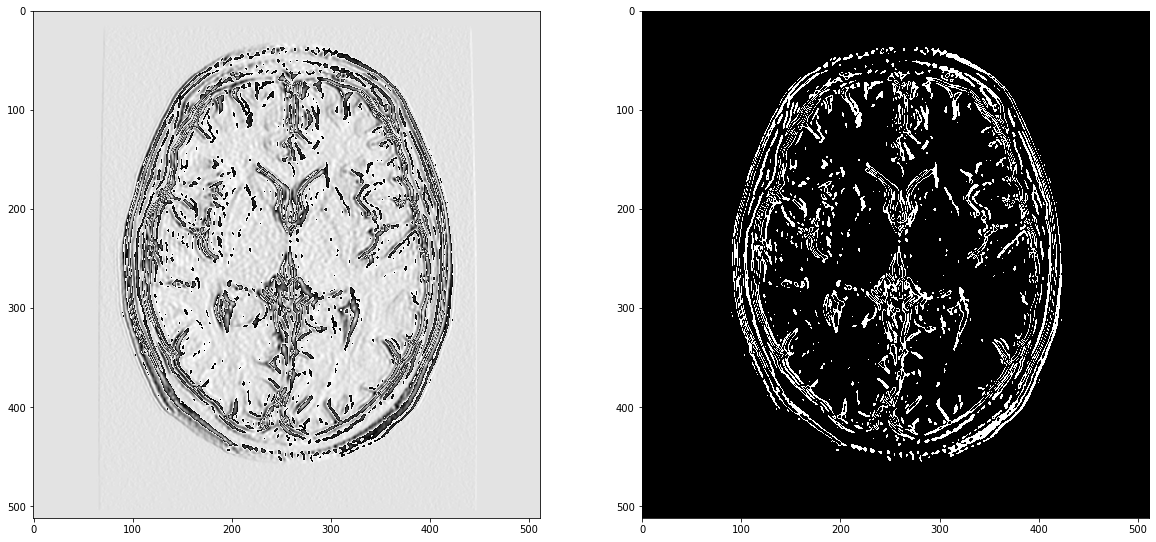

In [128]:
def norm_img(img):
    vmin = np.abs(img.min())
    vmax = np.abs(img.max())
    vran = vmax - vmin
    img = (img + vmin) / vran * 255.0
    img = np.uint8(img)
    return img

img_norm = norm_img(filtered_x)

_, img_thresh = cv.threshold(img_norm, 90, 255, cv.THRESH_BINARY_INV)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(img_norm, cmap='gray')
ax2.imshow(img_thresh, cmap='gray')

plt.show()